<a href="https://colab.research.google.com/github/pawarharshit/tensorflow_programs/blob/master/Movie_Review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [0]:
train_data,val_data,testing_data = tfds.load(name="imdb_reviews",split=('train[:60%]','train[60%:]','test'),as_supervised=True)

<DatasetV1Adapter shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [12]:
train_example_batch,train_label_batch = next(iter(train_data.batch(10)))
train_example_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [13]:
train_label_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [14]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

hub_layer(train_example_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [15]:
model = tf.keras.Sequential([
                    hub_layer,
                    tf.keras.layers.Dense(16,activation="relu"),
                    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
histort = model.fit(train_data.shuffle(10000).batch(522),
                    epochs = 20,
                    validation_data = val_data.batch(522),
                    verbose = 1
                    )

Epoch 1/20
29/29 [==============================] - 3s 111ms/step - loss: 1.2648 - accuracy: 0.5114 - val_loss: 0.7827 - val_accuracy: 0.5426
Epoch 2/20
29/29 [==============================] - 3s 110ms/step - loss: 0.7483 - accuracy: 0.5638 - val_loss: 0.7157 - val_accuracy: 0.5814
Epoch 3/20
29/29 [==============================] - 3s 111ms/step - loss: 0.6850 - accuracy: 0.6049 - val_loss: 0.6744 - val_accuracy: 0.6194
Epoch 4/20
29/29 [==============================] - 3s 107ms/step - loss: 0.6442 - accuracy: 0.6319 - val_loss: 0.6400 - val_accuracy: 0.6434
Epoch 5/20
29/29 [==============================] - 3s 110ms/step - loss: 0.6077 - accuracy: 0.6589 - val_loss: 0.6083 - val_accuracy: 0.6647
Epoch 6/20
29/29 [==============================] - 3s 109ms/step - loss: 0.5725 - accuracy: 0.6859 - val_loss: 0.5771 - val_accuracy: 0.6846
Epoch 7/20
29/29 [==============================] - 3s 111ms/step - loss: 0.5384 - accuracy: 0.7122 - val_loss: 0.5473 - val_accuracy: 0.7070
Epoch 

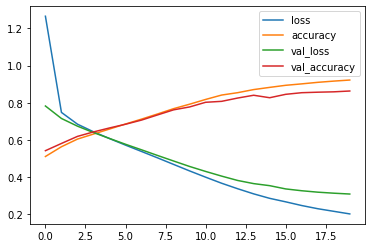

In [27]:

pd.DataFrame(histort.history).plot()

In [29]:
result = model.evaluate(testing_data.batch(522),verbose=2)
result

48/48 - 3s - loss: 0.3221 - accuracy: 0.8542


[0.3220753073692322, 0.8542400002479553]